# CS 216 Final Project
#### Authors: Ellie Kang, David Yao, Haseeb Chaudhry, Grace Chung, Yegor Kursakov

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import json

## Data

In [46]:
# Reading data in from Rotten Tomatoes CSV and TMDB CSV, cleaning, and wrangling

movies = pd.read_csv("rotten_tomatoes_movies.csv")
criticReviews = pd.read_csv("rotten_tomatoes_critic_reviews.csv")
tmdb = pd.read_csv("tmdb_5000_movies.csv")

movies["release_year"]=movies["original_release_date"].str.extract(r"([0-9]+)").astype('int',copy=False,errors="ignore")
tmdb["release_year"]=tmdb["release_date"].str.extract(r"([0-9]+)").astype('int',copy=False,errors="ignore")

# Merging movies and tmdb, and drops redundant/irrelevant columns

merged = pd.merge(movies,tmdb, how="inner",left_on=["movie_title", "release_year"],right_on=["original_title","release_year"])
merged = merged.drop(columns=["homepage","original_title","overview","title","status","tagline"])
merged = merged[merged['revenue'].notna()]
merged = merged[merged['revenue'] != 0.0]
merged = merged[merged['tomatometer_rating'].notna()]
merged = merged[merged['audience_rating'].notna()]
merged["profit"] = merged["revenue"] - merged["budget"]
print(merged.columns)
merged.head()

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres_x', 'directors',
       'authors', 'actors', 'original_release_date', 'streaming_release_date',
       'runtime_x', 'production_company', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_status',
       'audience_rating', 'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'release_year', 'budget', 'genres_y', 'id', 'keywords',
       'original_language', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime_y',
       'spoken_languages', 'vote_average', 'vote_count', 'profit'],
      dtype='object')


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres_x,directors,authors,actors,original_release_date,...,popularity,production_companies,production_countries,release_date,revenue,runtime_y,spoken_languages,vote_average,vote_count,profit
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,61.121717,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2010-02-01,226497209,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.0,2010,131497209
2,m/10002516-lost_city,The Lost City,"Fico Fellove (Andy Garcia), an apolitical Hava...","Its heart is in the right place, but what star...",R,Drama,Andy Garcia,"G. Cabrera Infante, Guillermo Cabrera Infante","Andy Garcia, Dustin Hoffman, Bill Murray, Inés...",2005-09-03,...,3.588529,"[{""name"": ""Lions Gate Films"", ""id"": 35}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-09-03,4386236,144.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.0,24,-5213764
3,m/10004288-running_scared,Running Scared,Mafia flunky Joey Gazelle (Paul Walker) is ord...,This film runs with frenetic energy punctuated...,R,"Action & Adventure, Drama, Mystery & Suspense",Wayne Kramer,Wayne Kramer,"Paul Walker, Cameron Bright, Vera Farmiga, Kar...",2006-02-24,...,19.311572,"[{""name"": ""International Production Company"", ...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2006-01-06,9500000,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.0,331,-7500000
4,m/10004504-ultraviolet,Ultraviolet,"In the late 21st-century, a vampiric disease m...",An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,...,15.895340,"[{""name"": ""Screen Gems"", ""id"": 3287}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-03-03,31070211,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",4.8,458,1070211
6,m/10005499-oliver_twist,Oliver Twist,An orphan (Barney Clark) in 19th-century Londo...,Polanski's version of Dickens' classic won't h...,PG-13,"Drama, Kids & Family",Roman Polanski,Ronald Harwood,"Ben Kingsley, Barney Clark, Leanne Rowe, Mark ...",2005-09-30,...,20.415572,"[{""name"": ""R.P. Productions"", ""id"": 355}, {""na...","[{""iso_3166_1"": ""CZ"", ""name"": ""Czech Republic""...",2005-09-23,42093706,130.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.7,274,-7906294


## Critic Reviews and Audience Reviews vs. Revenue

In [30]:
# Null hypothesis that the mean critic rating is the same as mean audience rating. Alt: they are not equal

rating_critic = merged["tomatometer_rating"]
rating_audience = merged["audience_rating"]
rating_ttest = stats.ttest_ind(rating_critic, rating_audience)
rating_ttest_pval = rating_ttest[1]
print(rating_ttest_pval)

3.067137417348897e-26


The p-value is 3.067e-26 , which is less than 0.05, so it is statistically significant. Thus, we reject the null hypothesis. The difference between the mean percentage of positive critic reviews is significantly different than the mean percentage of positive audience reviews.

In [31]:
# 95% Confidence interval of mean critic rating

data_crating = np.asarray(merged["tomatometer_rating"])
scale_crating = np.std(data_crating)/np.sqrt(len(data_crating))
conf_crating = stats.norm.interval(alpha = 0.95, loc = np.mean(data_crating), scale = scale_crating)
print(conf_crating[0], conf_crating[1])

54.53962555953019 56.6504196893386


In [32]:
# 95% Confidence interval of mean audience rating
data_arating = np.asarray(merged["audience_rating"])
scale_arating = np.std(data_arating)/np.sqrt(len(data_arating))
conf_arating = stats.norm.interval(alpha = 0.95, loc = np.mean(data_arating), scale = scale_arating)
print(conf_arating[0], conf_arating[1])

61.849939144256 63.31748167022364


(0.19866163836806247, 5.216507907664192e-25)

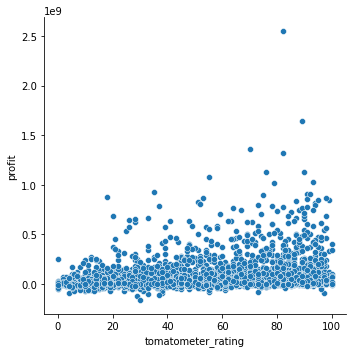

In [33]:
# Scatter Plot of Critic Rating vs. Revenue and resulting correlation coefficient

sns.relplot(x = "tomatometer_rating", y = "profit", data = merged)
a = list(merged['tomatometer_rating'])
b = list(merged['profit'])
stats.pearsonr(a,b)

(0.22066001256578938, 1.3171437604987354e-30)

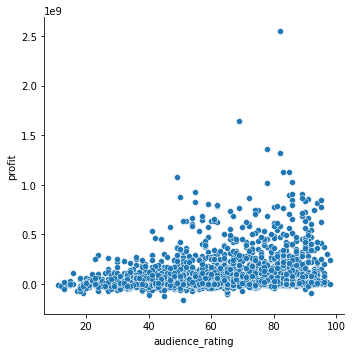

In [34]:
# Scatter plot  of Audience Rating vs. Revenue and resulting correlation coefficient

sns.relplot(x = "audience_rating", y = "profit", data = merged)
a = list(merged["audience_rating"])
b = list(merged['profit'])
stats.pearsonr(a,b)

## Log Transforms & Regression Models

In [35]:
#Improted packages for Log Transform and Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as prp
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt # to better format confusion matrix
from sklearn.pipeline import make_pipeline

Linear Regression Model w/ log Transform MSE: 2.5563923174095536e+16 r^2: 0.03548628276317034
Linear Regression Model MSE: 2.5458431049224036e+16 r^2: 0.03946644655908271


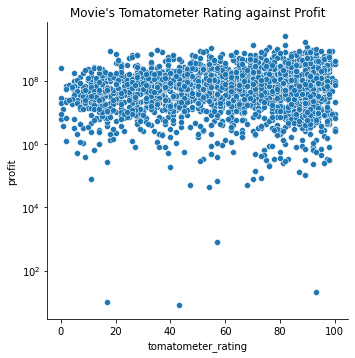

In [36]:
transformer = prp.FunctionTransformer(np.log1p, validate=True)

rip = sns.relplot(x='tomatometer_rating',y='profit',data=merged).set(title="Movie's Tomatometer Rating against Profit")
rip.set(yscale="log") 

#regressions
data = merged[["tomatometer_rating"]].values
target = merged["profit"].values

#log transform
log_model = make_pipeline(transformer, LinearRegression())
log_model.fit(X=data, y=target)

predicted = log_model.predict(data)

mse = mean_squared_error(target, predicted) # float: MSE of your model
r2 = r2_score(target, predicted) # float: R^2 score of your model

print("Linear Regression Model w/ log Transform MSE:", mse, "r^2:", r2)

#standard linear
linear_model = LinearRegression()
linear_model.fit(X=data, y=target)
predicted = linear_model.predict(data)

mse = mean_squared_error(target, predicted) # float: MSE of your model
r2 = r2_score(target, predicted) # float: R^2 score of your model

print("Linear Regression Model MSE:", mse, "r^2:", r2)

## Confusion Matrcies and Prediction Models

In [37]:
#Imported Packages to draw the confusion matrcies and implement the prediction models: logressions, Dummy classifier,
# and KNN. Also make use of some encoding methods.
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt # to better format confusion matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Logistic Regression (Critics Ratings):  0.576043068640646
Logistic Regression (Audience Ratings):  0.5746971736204576
KNN best n: 19
KNN:  0.5639300134589502
Baseline (Dummy Most Frequent: Crtic Rating):  0.49125168236877526
Baseline (Dummy Most Frequent: Audience Rating):  0.49125168236877526


/Users/haseebch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- audience_count
- audience_rating
Feature names seen at fit time, yet now missing:
- tomatometer_count
- tomatometer_rating

  warnings.warn(message, FutureWarning)
/Users/haseebch/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- audience_count
- audience_rating
Feature names seen at fit time, yet now missing:
- tomatometer_count
- tomatometer_rating

  warnings.warn(message, FutureWarning)


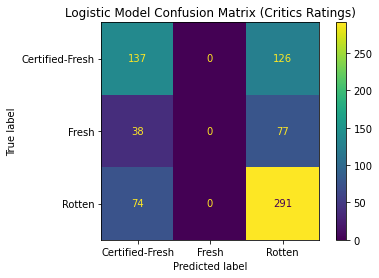

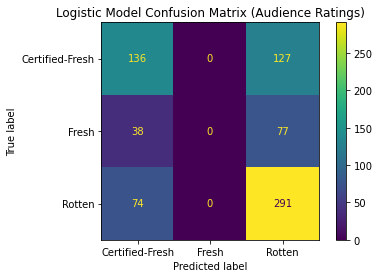

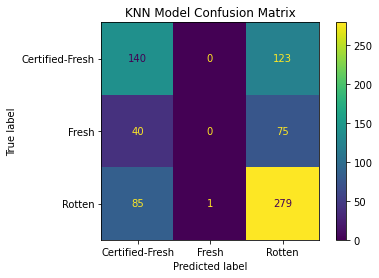

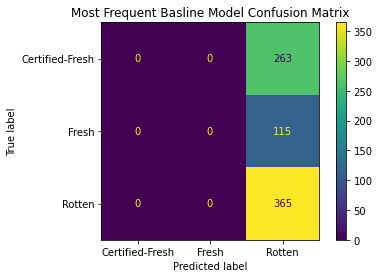

In [38]:

# In order to make use of the data for predictions we need to remove rows that contain NAN values as they error the
# packages used

#print(merged.describe())
#print(merged.columns)
mergedIN = merged.dropna()

# This code is legacy code. It was used to try and implement directors variable as a possible data value to help
# improve our accuracy for the logistic regression model. However, this was removed as it introduced too much 
# variation and strayed somewhat from the focused approach of our research questions.

'''
mergedIN2 = mergedIN[["budget", "vote_average", "audience_count", "audience_rating", "tomatometer_status",
                            "tomatometer_rating", "tomatometer_count", "revenue", "popularity", "directors"]]
mergedIN2 = mergedIN2.set_index(["budget", "vote_average", "audience_count", "audience_rating",
                            "tomatometer_rating", "tomatometer_count", "revenue", "tomatometer_status",
                            "popularity"]).apply(lambda x: x.str.split(',').explode()).reset_index()
num_popularity_data = mergedIN2[["budget", "vote_average", "audience_count", "audience_rating", "tomatometer_status",
                            "tomatometer_rating", "tomatometer_count", "revenue", "popularity"]]
cat_popularity_data = OneHotEncoder().fit_transform(mergedIN2[["directors"]].values).toarray()
mergedIN3 = np.append(num_popularity_data, cat_popularity_data, axis=1)
'''

# set the target value that the models should predict. Filter the data columns that will be used for the prediction
# Do a super filter for all needed data that will then be seperated for the two confusion matrcies
popularity_target = mergedIN["tomatometer_status"]
popularity_data = mergedIN[["budget", "audience_count", "audience_rating","tomatometer_rating", 
                            "tomatometer_count", "revenue", "popularity"]]

#Split the given data and targets into two groups: training and testing. Training is what the models 
# will use to learn. Testing will be used to check accuracy if new data need to be predicted on.
popularity_train_data, popularity_test_data, popularity_train_target, popularity_test_target = train_test_split(
    popularity_data, popularity_target, test_size=0.3, random_state=2)

#Split the training and test data into two groups in order to test which rating system provides a better prediction
# The two sets share certain columns to improve overall accuracy and vary on the chosen rating system and its counts
# only
audience_popularity_data_train = popularity_train_data[["budget", "audience_count", "audience_rating",
                                                        "revenue", "popularity"]]
critic_popularity_data_train = popularity_train_data[["budget", "tomatometer_rating", "tomatometer_count", 
                                                      "revenue", "popularity"]]
audience_popularity_data_test = popularity_test_data[["budget", "audience_count", "audience_rating",
                                                        "revenue", "popularity"]]
critic_popularity_data_test = popularity_test_data[["budget", "tomatometer_rating", "tomatometer_count", 
                                                      "revenue", "popularity"]]

#Logistic Model utilizing the critic rating system with critic count in addition to base variables:
# budget, revenue, popularity
logistic_model_c = LogisticRegression(max_iter=1000)
logistic_model_c.fit(X=critic_popularity_data_train, y=popularity_train_target)
predictedCrit = logistic_model_c.predict(critic_popularity_data_test)

#Logistic Model utilizing the audienve rating system with audience count in addition to base variables:
# budget, revenue, popularity
logistic_model_a = LogisticRegression(max_iter=1000)
logistic_model_a.fit(X=audience_popularity_data_train, y=popularity_train_target)
predictedAudi = logistic_model_a.predict(audience_popularity_data_test)

# KNN model making use of the closest neighbor form of data analysis. The selected n_neighbors range is 1,20.
# The analysis was performed on the critics set of data.
# The KNN model wasn't used as the other two confusion matrices and baseline comparison provided more substantial
# Result analysis. The Model was left in here in case of future use by other researchers.
params_to_try = {'n_neighbors': range(1, 20)}
knn_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_to_try)
knn_search.fit(critic_popularity_data_train, popularity_train_target)

#The first baseline model was made using the Dummy Classifer (Most Frequent). This classifier was trained and
# tested on the audience rating subdata set.
baseline_1 = DummyClassifier(strategy='most_frequent')
baseline_1.fit(audience_popularity_data_train, popularity_train_target)
baseline_1_predicted = baseline_1.predict(audience_popularity_data_test)

#The second baseline model was made using the Dummy Classifer (Most Frequent). This classifier was trained and
# tested on the critic rating subdata set.
baseline_2 = DummyClassifier(strategy='most_frequent')
baseline_2.fit(critic_popularity_data_train, popularity_train_target)
baseline_2_predicted = baseline_1.predict(critic_popularity_data_test)

#The results of each model's accuracy was printed below (KNN best number of n values was also printed)
print("Logistic Regression (Critics Ratings): ", accuracy_score(y_true=popularity_test_target, y_pred=predictedCrit))
print("Logistic Regression (Audience Ratings): ", accuracy_score(y_true=popularity_test_target, y_pred=predictedAudi))
print('KNN best n:', knn_search.best_params_['n_neighbors'])
print('KNN: ', knn_search.score(audience_popularity_data_test, popularity_test_target))
print("Baseline (Dummy Most Frequent: Crtic Rating): ", 
      accuracy_score(y_true=popularity_test_target, y_pred=baseline_2_predicted))
print("Baseline (Dummy Most Frequent: Audience Rating): ", 
      accuracy_score(y_true=popularity_test_target, y_pred=baseline_1_predicted))


#Below are the confusion matrices printed out for each time of model
#This confusion matrix is made from the Logistic model trained on the crtics ratings subdata set.
ConfusionMatrixDisplay.from_estimator(estimator=logistic_model_c, X=critic_popularity_data_test, 
                                      y=popularity_test_target)
plt.title("Logistic Model Confusion Matrix (Critics Ratings)")
plt.grid(False)

#This confusion matrix is made from the Logistic model trained on the audience ratings subdata set.
ConfusionMatrixDisplay.from_estimator(estimator=logistic_model_a, X=audience_popularity_data_test,
                                      y=popularity_test_target)
plt.title("Logistic Model Confusion Matrix (Audience Ratings)")
plt.grid(False)

#This confusion matrix is made from the KNN model trained on the audience ratings subdata set.
ConfusionMatrixDisplay.from_estimator(estimator=knn_search, X=audience_popularity_data_test, y=popularity_test_target)
plt.title("KNN Model Confusion Matrix")
plt.grid(False)

#This confusion matrix is made from the Baseline model trained on the audience ratings subdata set.
ConfusionMatrixDisplay.from_estimator(estimator=baseline_1, X=audience_popularity_data_test, y=popularity_test_target)
plt.title("Most Frequent Basline Model Confusion Matrix")
plt.grid(False)


## Research Question #2: Do Movie characteristics Affect Box Office Performance Predictions using Reviews

[None]

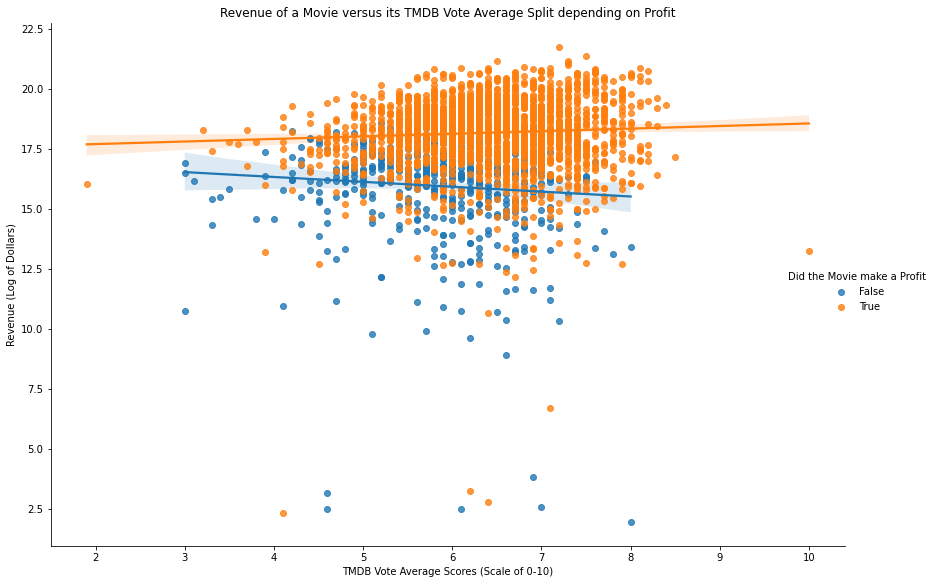

In [50]:
#Create a copy of the merged data set in order to avoid adding needless columns
mergedCopy = merged.copy(deep=True)

#Create new columns for whether a movie was profitable (true or false) and the log of the Revenue column for 
# visualization purposes
mergedCopy['positive_profit'] = mergedCopy["profit"] > 0
mergedCopy['revenue_log'] = np.log(mergedCopy['revenue'])

# Look at the correlation between log of Revenue and popularity of a movie split into two groups (was it profitable
# or not)
# The sns plot below is a scatter plot with a line of best fit for both groups of data. It has a logartihmically scaled
# y axis in order to provide a cleaner and better visualization. The axes are log of revenue and populairty.
# legen is true or false for positive_profit column
sns.lmplot(data=mergedCopy, x="vote_average", y="revenue_log", hue= "positive_profit", aspect = 1.5, height = 8).set(
            xlabel ="TMDB Vote Average Scores (Scale of 0-10)", ylabel="Revenue (Log of Dollars)",
            title='Revenue of a Movie versus its TMDB Vote Average Split depending on Profit').legend.set(
            title = "Did the Movie make a Profit")

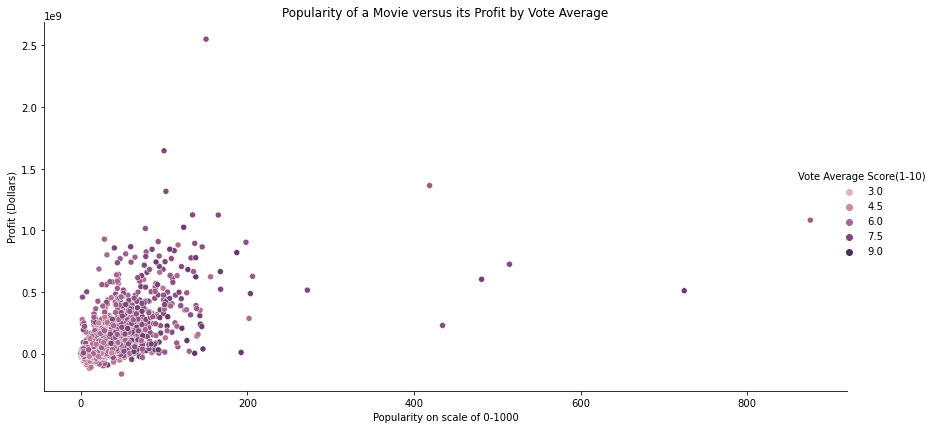

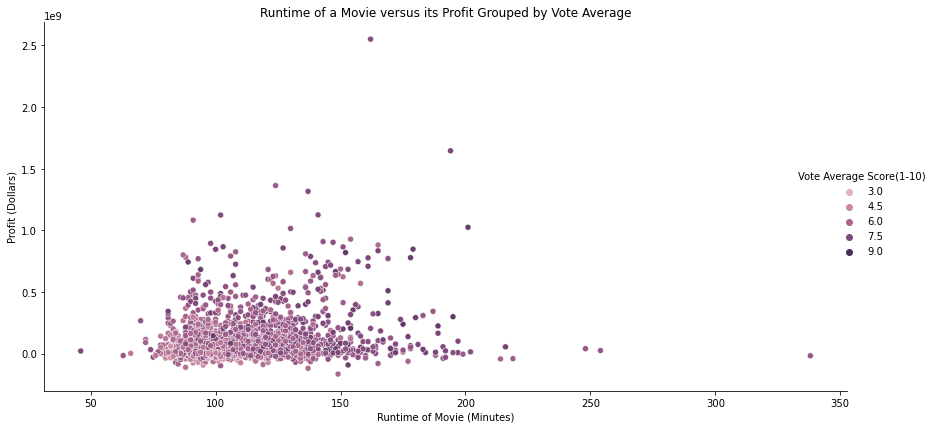

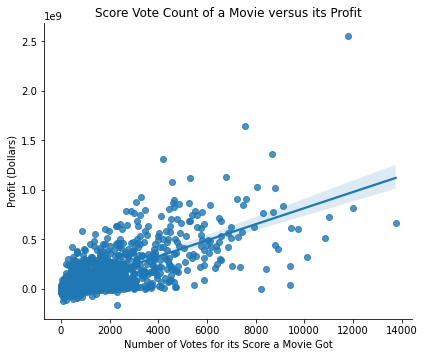

In [40]:
#The sns plot below creates a scatter plot visualization with shading. It has a x axis for popularity and a y axis
# for profit. The data values are shaded on a scale of 0-10 to indicate what was its vote average.
sns.relplot(data=merged, x="popularity", y="profit", aspect = 2, height = 6, hue = "vote_average").set(
            xlabel ="Popularity on scale of 0-1000", ylabel="Profit (Dollars)",
            title='Popularity of a Movie versus its Profit by Vote Average').legend.set(
            title = "Vote Average Score(1-10)")

#The sns plot below creates a scatter plot visualization with shading. It has a x axis for runtime and a y axis
# for profit. The data values are shaded on a scale of 0-10 to indicate what was its vote average.
sns.relplot(data=merged, x="runtime_y", y="profit", aspect = 2, height = 6, hue = "vote_average").set(
            xlabel ="Runtime of Movie (Minutes)", ylabel="Profit (Dollars)", 
            title='Runtime of a Movie versus its Profit Grouped by Vote Average').legend.set(
            title = "Vote Average Score(1-10)")

#The sns plot below creates a scatter plot visualization with no shading and a line of best fit. It has a x axis 
# for number of votes it had to determine its vote average and a y axis for profit. The line of best fit showed
# the overall trend and correlation.
sns.lmplot(data=merged, x="vote_count", y="profit", aspect = 1.2, height = 5).set(
            xlabel ="Number of Votes for its Vote Average Score", ylabel="Profit (Dollars)",
            title='Score Vote Count of a Movie versus its Profit')

[None]

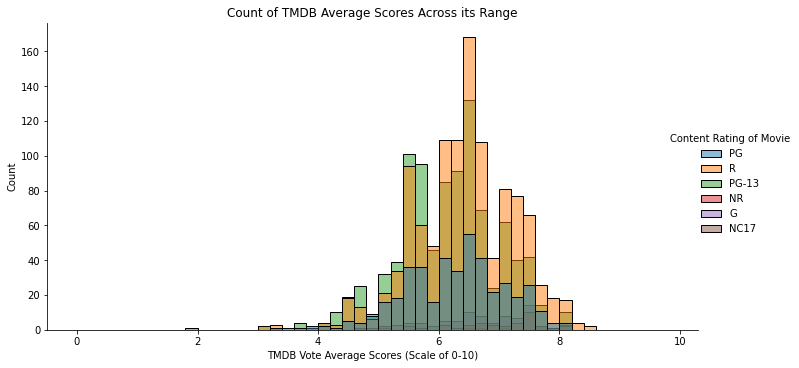

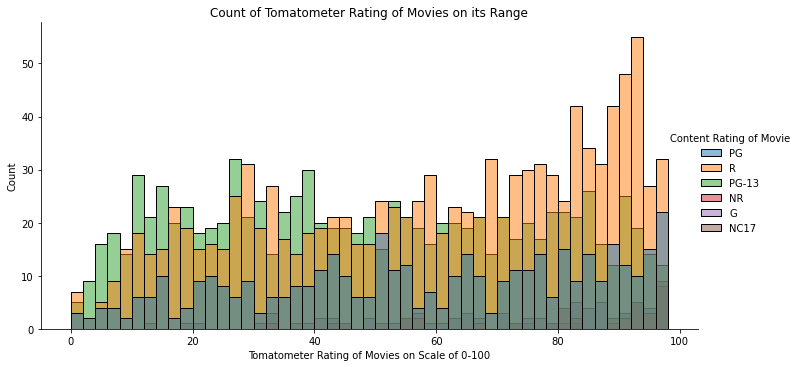

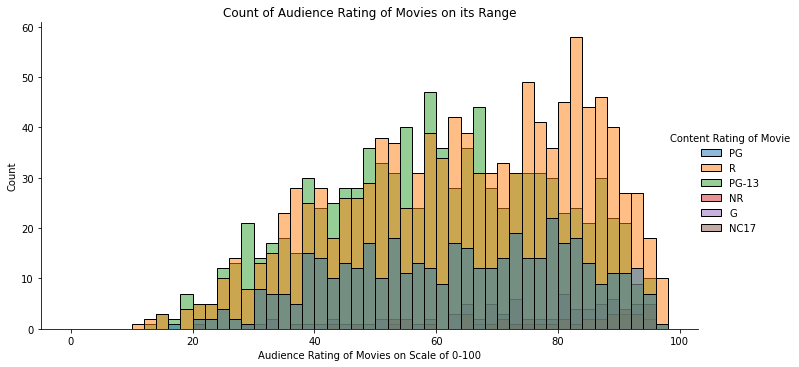

In [41]:
#Create a copy of the merged data set in order to avoid adding needless columns
mergedCopy2 = merged.copy(deep=True)

#See if there is a bias in the overall data set, and the distribution of the scores given content rating of the movie

#The sns plot is a histogram plot of the vote average with each one grouped by content rating. The bins for the plot
# have a step of 0.2 ranging from 0 to 10.
sns.displot(x='vote_average', data=merged, bins=[0 + 0.2*i for i in range(50)], aspect = 2, 
            hue = "content_rating").set(xlabel ="TMDB Vote Average Scores (Scale of 0-10)", 
            title='Count of TMDB Average Scores Across its Range').legend.set(
            title = "Content Rating of Movie")

#The sns plot is a histogram plot of the Tomatometer rating with each one grouped by content rating. The bins are 
# set to a step size of two ranging from 0 to 100.
sns.displot(x='tomatometer_rating', data=merged, aspect = 2, hue = 'content_rating', 
            bins=[0 + 2*i for i in range(50)]).set(
            xlabel ="Tomatometer Rating of Movies on Scale of 0-100", 
            title='Count of Tomatometer Rating of Movies on its Range').legend.set(
            title = "Content Rating of Movie")

#The sns plot is a histogram plot of the Audience rating with each one grouped by content rating. The bins are 
# set to a step size of two ranging from 0 to 100.
sns.displot(x='audience_rating', data=merged, aspect = 2,  hue = "content_rating", 
            bins=[0 + 2*i for i in range(50)]).set(
            xlabel ="Audience Rating of Movies on Scale of 0-100", 
            title='Count of Audience Rating of Movies on its Range').legend.set(
            title = "Content Rating of Movie")

[None]

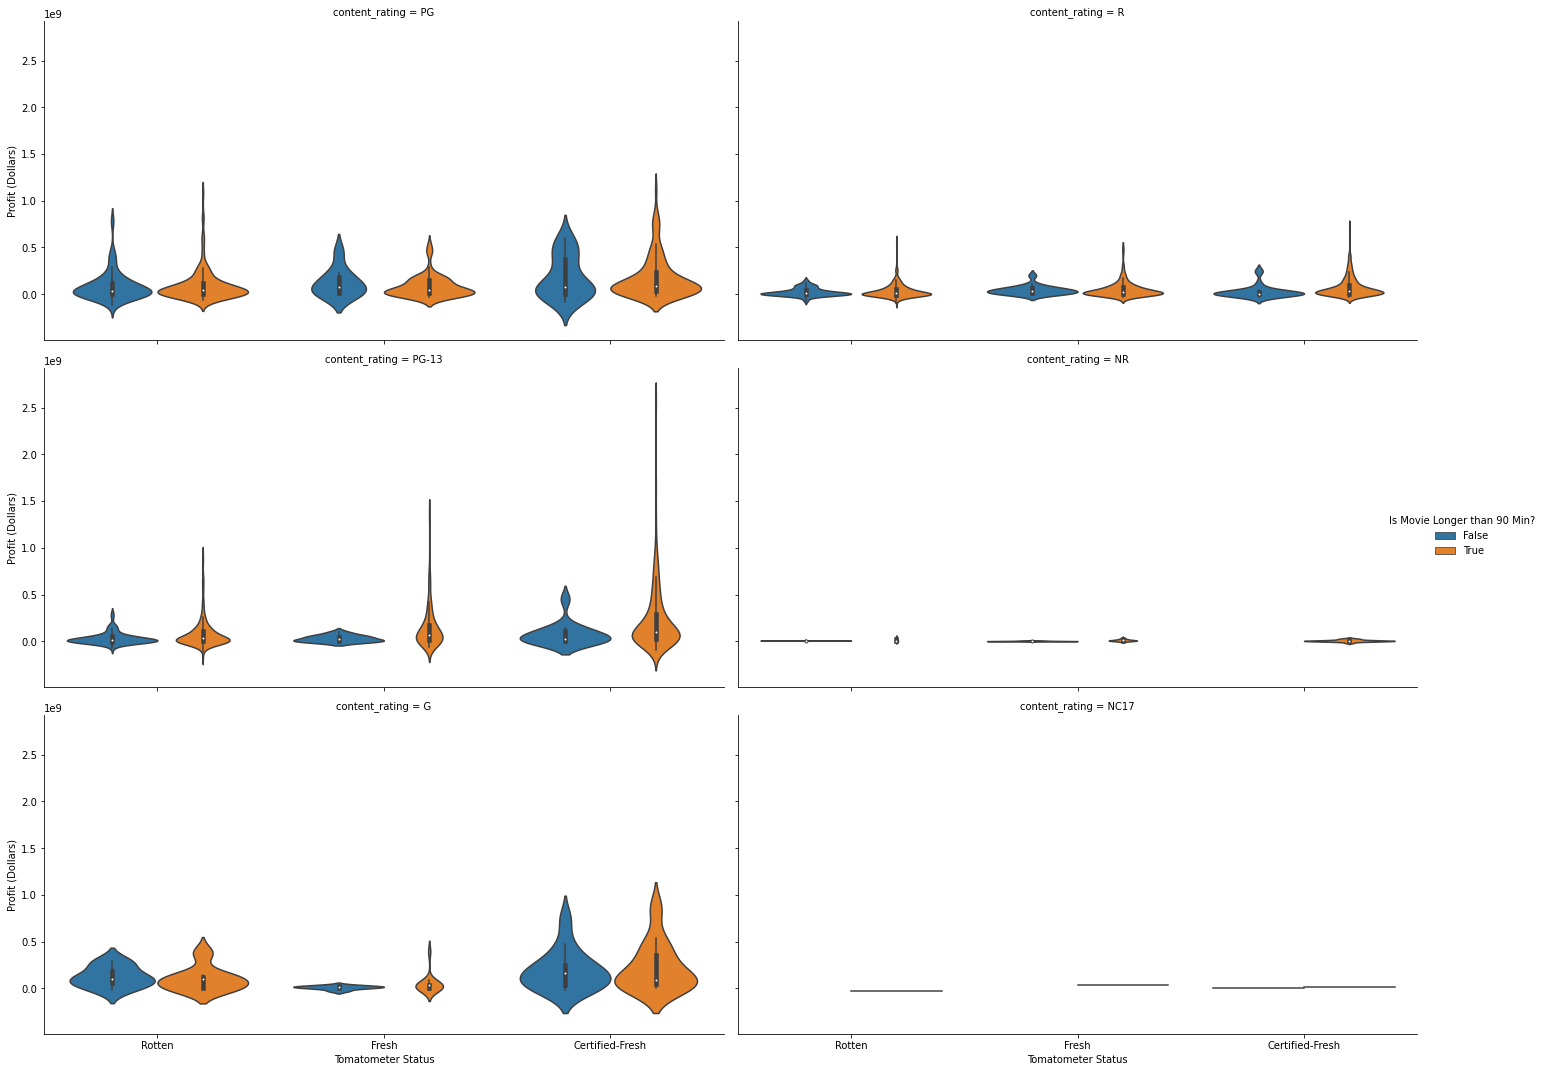

In [51]:
#Create a copy of the merged data set in order to avoid adding needless columns
mergedCopy3 = merged.copy(deep=True)

#Create a new column that determines whether a movie was longer than 90 mins or not (true or false)
mergedCopy3["longer_than_90_min"] = mergedCopy3["runtime_x"] > 90

#Create a sns violin plot. The plot has a y variable of Profit. The Violin plot is 6 different plots representing a
# particular content rating in each plot. In each subplot the movie data is split into the movies tomatometer status
# then each of these status were split in to two groups of whether a moview was longer than 90 mins or not
sns.catplot(x='tomatometer_status', y='profit', col = "content_rating", 
            hue='longer_than_90_min', kind="violin", data=mergedCopy3, aspect = 2, height = 5, col_wrap=2).set(
            ylabel = "Profit (Dollars)", xlabel = "Tomatometer Status").legend.set(
            title = "Is Movie Longer than 90 Min?")

/var/folders/l5/jmxk_yvd14b732_jhqqp1nzr0000gn/T/ipykernel_12591/2029627520.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF1['release_dates_(Rotten_Tomato)'] = mergedGroupByM.index
/var/folders/l5/jmxk_yvd14b732_jhqqp1nzr0000gn/T/ipykernel_12591/2029627520.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF1["y_var"] = "revenue"
/var/folders/l5/jmxk_yvd14b732_jhqqp1nzr0000gn/T/ipykernel_12591/2029627520.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

[None]

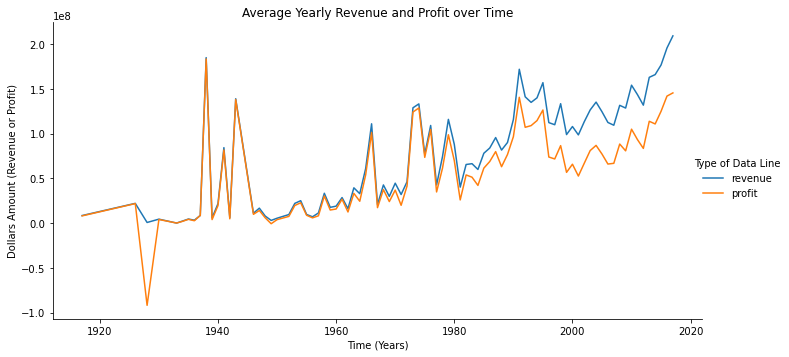

In [52]:
#Convert the string format of the movies release date into a Timestamp format readable by plots
merged['release_dates_(Rotten_Tomato)'] = pd.to_datetime(merged['original_release_date'],
                                                           format= '%Y-%M-%d')

#Group the data by the release data on the Year variable in the column. Then take the average for all values in that
# groupby group.
mergedGroupByM = merged.groupby(pd.Grouper(key='release_dates_(Rotten_Tomato)', axis=0, freq='Y')).mean()

#Create a new dataframe in order to overlay the two sets of data for Revenue and Profit
#First new data frame create a set for the average revenue per year
newDF1 = mergedGroupByM[['revenue']]
newDF1['release_dates_(Rotten_Tomato)'] = mergedGroupByM.index
newDF1["y_var"] = "revenue"
newDF1.rename(columns = {'revenue':'dollar_amount(revenue_&_profit)'}, inplace = True)

#Second new data frame create a set for the average profit per year
newDF2 = mergedGroupByM[['profit']]
newDF2['release_dates_(Rotten_Tomato)'] = mergedGroupByM.index
newDF2["y_var"] = "profit"
newDF2.rename(columns = {'profit':'dollar_amount(revenue_&_profit)'}, inplace = True)

#Combine the two data sets vertically crating one from which we can plot.
newDF = pd.concat([newDF1,newDF2], ignore_index=True)

#The sns plot below is a line plot of the average profit and average revenue per year. The x axis is the time.
# The y axis is the dollar amount. There are two lines: one for revenue and one for profit
sns.relplot(data=newDF, x="release_dates_(Rotten_Tomato)", y="dollar_amount(revenue_&_profit)",
            kind="line", aspect = 2, hue = "y_var").set(xlabel ="Time (Years)", 
            ylabel = "Dollars Amount (Revenue or Profit)", 
            title='Average Yearly Revenue and Profit over Time').legend.set(
            title = "Type of Data Line")